In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
training_steps = 1000
display_steps = 50

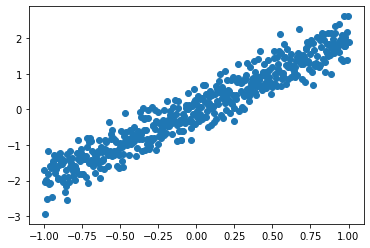

In [3]:
X = np.linspace(-1, 1, 500)
Y = 2 * X + np.random.randn(*X.shape)*.35
plt.scatter(X, Y)
plt.show()

In [4]:
W = tf.Variable(np.random.randn(), name="weight")
B = tf.Variable(np.random.randn(), name="bias")

def linear_regression(x):
    return W * X + B

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [5]:
def train():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    gradients = g.gradient(loss, [W, B])
    
    optimizer.apply_gradients(zip(gradients, [W, B]))

In [6]:
for step in range(1, training_steps + 1):
    train()
    
    if step % display_steps == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, B: %f" % (step, loss, W.numpy(), B.numpy()))

step: 50, loss: 2.839628, W: -0.861100, B: 0.209444
step: 100, loss: 1.492198, W: -0.053467, B: 0.081601
step: 150, loss: 0.817066, W: 0.523804, B: 0.035044
step: 200, loss: 0.473902, W: 0.936421, B: 0.018090
step: 250, loss: 0.298815, W: 1.231347, B: 0.011915
step: 300, loss: 0.209394, W: 1.442151, B: 0.009667
step: 350, loss: 0.163714, W: 1.592828, B: 0.008848
step: 400, loss: 0.140376, W: 1.700526, B: 0.008550
step: 450, loss: 0.128453, W: 1.777506, B: 0.008441
step: 500, loss: 0.122362, W: 1.832530, B: 0.008402
step: 550, loss: 0.119250, W: 1.871858, B: 0.008387
step: 600, loss: 0.117660, W: 1.899969, B: 0.008382
step: 650, loss: 0.116848, W: 1.920062, B: 0.008380
step: 700, loss: 0.116433, W: 1.934423, B: 0.008379
step: 750, loss: 0.116221, W: 1.944689, B: 0.008379
step: 800, loss: 0.116112, W: 1.952027, B: 0.008379
step: 850, loss: 0.116057, W: 1.957271, B: 0.008379
step: 900, loss: 0.116029, W: 1.961020, B: 0.008379
step: 950, loss: 0.116014, W: 1.963699, B: 0.008379
step: 1000,

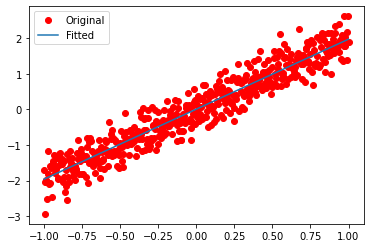

In [7]:
plt.plot(X, Y, 'ro', label='Original')
plt.plot(X, np.array(W * X + B), label='Fitted')
plt.legend()
plt.show()